## Covariance, Correlation, Least Square Method in Regression Analysis
### Covariance and Correlation Coefficient
**Sample Covariance** measures the strength and the direction of the relationship between the elements of **two** samples. **Variance**, as defined before deals with **one** sample of data whereas **Covariance** measures how much and in what direction a variable change (***positive, negative or independent***) with the change of the second variable.

***--> create math notations***

**Covariance** of two samples of data [x1, x2...xi] and [y1, y2,...yi] is measured as

**Cov(xy) = SUM((xi - x-bar)(yi - y-bar))/(n-1)** where

xi, yi = The ith value of the two samples (x, y) of data

x-bar, y-bar = Average of x-data sample and y-data sample

n = sample size

**Positive Covariance** means y-value increases as x-value increases. **Negative Covariance** means y-value decreases as x-value increases. **Zero Covariance (Covariance value zero or close to zero** means x-values and y-values are **Independent or Nearly Independent** of each other.

**Sample Correlation**, also called **Correlation Coefficient** between data samples x and y is measured from the **Covariance** between x, y using the formula

**r-xy = (S-xy)/ (sigma-x)(sigma-y)** where 

r-xy = Correlation Coefficient between x and y

S-xy = Covariance between x, y

sigma-x = Standard Deviation of x

sigma-y = Standard Deviation of y

**Correlation Coefficient** is **unit-less** and has values between -1 (perfect anti-correlation) and +1 (perfect correlation). 

Positive, negative and zero/near-zero **Correlation Coefficient** are interprted in the same way as positive, negative and zero/near-zero **Covariance**

We will be using **Covariance, Correlation Coefficient** in details in **Regression Analysis (Predictive Analytics section)**. In **Regression Analysis** we will primarily use **Least Square** method of finding the best fit for the **Regression Line** through the data.

We will discuss **Least Square Method** briefly here and in more details in **Regression Analysis (Predictive Analytics)** section.

The **Covariance** and **Correlation Coefficient** of data samples can be calculated using Python as follows



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from __future__ import division
import math
from decimal import Decimal

In [3]:

input_data = [2, 27, 48, 99, 348, 587, 439, 567, 602]

def data_range(x):
    return max(x) - min(x)
print(data_range(input_data))
print('===================================================')

print(sum(input_data))
print("=====================")

def mean(x):
    return round((sum(x) / len(x)), 2)

# print(mean(input_data))
# print('===================================================')

def diff_from_mean(x):
    x_bar = mean(x)
    return [round((x_i - x_bar), 2) for x_i in x]
print(diff_from_mean(input_data))
print('===================================================')

def sum_of_squares(x):
    return(sum(x_i**2 for x_i in x))
print((sum_of_squares(input_data)))
print('===================================================')

def variance(x):
    l = len(x)
    deviations = diff_from_mean(x)
    return (sum_of_squares(deviations)/(l - 1))
print(round(variance(input_data), 2))
print('===================================================')

def standard_deviation(x):
    v = variance(x)
    return math.sqrt(v)
print('Standard Deviation of Input Data = ', round(standard_deviation(input_data), 2))
print('===================================================')

600
2719
[-300.11, -275.11, -254.11, -203.11, 45.89, 284.89, 136.89, 264.89, 299.89]
1355125
66710.61
Standard Deviation of Input Data =  258.28


In [4]:
x = [1, 23, 36, 49, 53, 67]
y = [12, 207, 389, 497, 503, 694]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
print(dot(x, y))

def covariance(x, y):
    n = len(x) # length of both x and y are required to be the same
    return (dot(diff_from_mean(x), diff_from_mean(y)))/ (n-1)

print('Covariance between x and y = ', covariance(x, y))
print('===================================================')

def correlation(x, y):
    sdev_x = standard_deviation(x)
    sdev_y = standard_deviation(y)
    if sdev_x > 0 and sdev_y > 0:
        return covariance(x,y)/(sdev_x * sdev_y)
    else:
        return 0
    
print('Correlation between x and y = ', round(correlation(x, y), 4))
print('===================================================')

116287
Covariance between x and y =  5685.46668
Correlation between x and y =  0.9956


## Least Square Method
**Covariance** and **Correlation** are measures of linear association. In **Linear Regression**the first variable xi is ca
lled the **explanatory or predictive** variable. The corresponding observation yi, taken from the input xi, is called the **response**. For example, can we explain or predict the **income of banks (response variable)** from its **assets (explanatory variable)**.

In **Linear Regression**, the response variable is linearly related to the explanatory variable, but is subject to deviation
or to **error**. So the relationship can be expressed as 


  **y-i = alpha + beta * x-i + error**
  
Our goal is, given the data, the x-i’s and y-i’s, to find the values of **alpha** and **beta** that will give the line having the best fit to the data. The principle of **Least Squares Regression** states that the best choice of this linear relationship is the one that minimizes the **square in the vertical distance (error)** from the y values in the data and the y values on the regression line. Thus, our problem of finding the **best fit** line translates to a **minimization** problem.

This can be done with a small amount of calculus ("Gradient Descent", which we will **not do**). We will also have to note two important facts
* ***With the best fit the error is always zero***
* ***The best fit line passes through the point x-bar, y-bar***

Skipping the calculus, the value of **beta** for the best fit (called **beta-hat**) is

**beta-hat = Covariance(x,y) / Variance (x)**

Also since the best fit line passes through (x-bar, y-bar), 

**y-bar = alpha-hat + beta-hat * x-bar + 0** (error = 0 for the best fit line)


**alpha-hat = y-bar - beta-hat * x-bar**

We have already created the Python functions for **Covariance(x,y) and Variance(x)**, **x-bar and y-bar***, and so we can easily calculate the value of **beta-hat** using those functions. Once **beta-hat** is calculated, **alpha-hat** can be calculated by substituting the values of **beta-hat, x-bar and y-bar**.

We will get back to this subject in more details in the **Linear Regression (Predictive Analytics)** section.

We will start with and spend most of our time with  **Simple Linear Regression** where the **dependent variable (response)** depnds on a **single** **independent (explanatory) variable**.

We will also discuss the case of **Multiple Linear Regression** where the **dependent variable (response)** depnds on **multiple independent (explanatory) variables**.

A third method of regression called the **Logistic Regression** will also be dicussed.

We will also calculate the **Residuals** which the difference between the **Actual** and the **Predicted** values

**Actuals** will be taken from the data and **Predicted** values will be calculated using the **Slope** and **Intercept** for each value of X

We will get a list of **Residuals (also called Errors)** and then we will calculate

1. ***SSR (Sum of Squared Residuals)***

2. ***Sum of Residuals***


In [5]:
sq_ft = [1400,1600,1700,1875,1100,1550,2350,2450,1425,1700] # Independent variable (X)
price = [245,312,279,308,199,219,405,324,319,255]   # Dependent Variable (y)

cov_xy = round(covariance(sq_ft, price), 4)
print('Covariance between square footage and house price = ', cov_xy)

var_x = round(variance(sq_ft), 4)
print('Variance of square footage', var_x)

r_xy = correlation(sq_ft, price)
print('Correlation between square footage and proce = ', round(r_xy, 4))

r_sq = r_xy**2 * 100
print(round(r_sq, 4) , '% of the prices are explained by the line of best fit')

Covariance between square footage and house price =  19166.6667
Variance of square footage 174611.1111
Correlation between square footage and proce =  0.7621
58.0817 % of the prices are explained by the line of best fit


In [6]:
beta_1_hat = round((cov_xy/var_x), 6) # Slope of the best fit straight line
print('beta_1_hat (slope of the best fit straight line) = ', beta_1_hat)

beta_1_hat (slope of the best fit straight line) =  0.109768


In [7]:
sq_ft_mean = mean(sq_ft)
print('Mean square footage (x-bar) = ', sq_ft_mean )
price_mean = mean(price)
print('Mean price (y-bar) = ', price_mean)

Mean square footage (x-bar) =  1715.0
Mean price (y-bar) =  286.5


In [8]:
beta_0_hat = round((price_mean - beta_1_hat * sq_ft_mean), 6) # Intercept of the best fit straight line
print('beta_0_hat (intercept of the best fit straight line) = ', beta_0_hat)

beta_0_hat (intercept of the best fit straight line) =  98.24788


In [9]:
def get_y_pred(x, slope, intercept):
    return (x * slope + intercept)

In [10]:
x = 1400
print('Predicted price (in $1000) for house with square footage = ', x, 'is ', round(get_y_pred(x, beta_1_hat, beta_0_hat), 2))
print('================')
x = 1600
print('Predicted price (in $1000) for house with square footage = ', x, 'is ', round(get_y_pred(x, beta_1_hat, beta_0_hat), 2))
print('================')
x = 1700
print('Predicted price (in $1000) for house with square footage = ', x, 'is ', round(get_y_pred(x, beta_1_hat, beta_0_hat), 2))
print('================')

Predicted price (in $1000) for house with square footage =  1400 is  251.92
Predicted price (in $1000) for house with square footage =  1600 is  273.88
Predicted price (in $1000) for house with square footage =  1700 is  284.85


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

House Price List =  [251.92]
------------------
House Price List =  [251.92, 273.88]
------------------
House Price List =  [251.92, 273.88, 284.85]
------------------
House Price List =  [251.92, 273.88, 284.85, 304.06]
------------------
House Price List =  [251.92, 273.88, 284.85, 304.06, 218.99]
------------------
House Price List =  [251.92, 273.88, 284.85, 304.06, 218.99, 268.39]
------------------
House Price List =  [251.92, 273.88, 284.85, 304.06, 218.99, 268.39, 356.2]
------------------
House Price List =  [251.92, 273.88, 284.85, 304.06, 218.99, 268.39, 356.2, 367.18]
------------------
House Price List =  [251.92, 273.88, 284.85, 304.06, 218.99, 268.39, 356.2, 367.18, 254.67]
------------------
House Price List =  [251.92, 273.88, 284.85, 304.06, 218.99, 268.39, 356.2, 367.18, 254.67, 284.85]
------------------


Text(0.5, 0, 'Square Footage')

Text(0, 0.5, 'Predicted House Price')

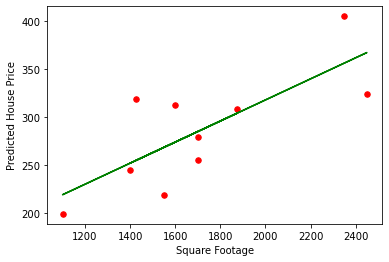

In [12]:
house_price_list = []
for x_i in sq_ft:
    house_price_list.append(round(get_y_pred(x_i, beta_1_hat, beta_0_hat), 2))
    print('House Price List = ', house_price_list)
    print('------------------')

plt.scatter(sq_ft, price, color='red', marker='o', s=30)
plt.plot(sq_ft, house_price_list, color = "g")
plt.xlabel('Square Footage') 
plt.ylabel('Predicted House Price') 

In [13]:
def get_residuals(list1, list2):
    residuals = []
    i = 0
    while i < len(list1):
        residuals.append(round((list1[i] - list2[i]), 2))
        i+= 1;
    return residuals

errors = get_residuals(price,house_price_list)
print('Errors or Residuals of Predicted and Actual House Prices =', errors)

Errors or Residuals of Predicted and Actual House Prices = [-6.92, 38.12, -5.85, 3.94, -19.99, -49.39, 48.8, -43.18, 64.33, -29.85]


In [14]:
def get_ssr(list1, list2):
    res = get_residuals(list1, list2)
    ssr = 0
    i = 0
    while i < len(res):
        ssr = ssr + (res[i])**2
        i+= 1
    return ssr


def get_sum_residuals(list1, list2):
    res = get_residuals(list1, list2)
    sum_res = 0
    i = 0
    while i < len(res):
        sum_res += res[i]
        i+= 1
    return round(sum_res, 1)

house_price_sum_residuals = get_sum_residuals (price, house_price_list)
print('Sum of Residuals of Predicted and Actual House Prices = ', house_price_sum_residuals)

print('===================')
house_price_ssr = round(get_ssr(price, house_price_list), 4)
print('Sum Squared Residuals of Predicted and Actual House Prices = ', house_price_ssr)

Sum of Residuals of Predicted and Actual House Prices =  0.0
Sum Squared Residuals of Predicted and Actual House Prices =  13665.0629


## Linear Regression Data set = House Price

Mean of the exploratory (independent) variable =  1715.0
Mean of response (dependent) variable =  286.5
Covariance between exploratory and response variables =  19166.6667
Variance of exploratory (independent) variable =  174611.1111
beta_1_hat (slope of the best fit straight line) =  0.109768
beta_0_hat (intercept of the best fit straight line) =  98.24788
Response value list is  [251.92, 273.88, 284.85, 304.06, 218.99, 268.39, 356.2, 367.18, 254.67, 284.85]
Errors or Residuals of Predicted Response value and Actual Exploratory value = [-6.92, 38.12, -5.85, 3.94, -19.99, -49.39, 48.8, -43.18, 64.33, -29.85]
Sum of Residuals of Predicted and Actual Response Values =  0.0
Sum Squared Residuals of Predicted and Actual Response Values =  13665.0629
Correlation between Exploratory and Response variables =  0.7621
R-square between Exploratory and Response variables =  58.0817
Goodness of fit : 58.0817 % of the Response Variable values are explained by the line of best fit


,X Mean,Y Mean,Beta-0(Slope),Beta-1(Intercept),SumOfResiduals,SumSquareResiduals,R-XY(Correlation),R-Square-XY,Goodness of fit(%)
0,1715.0,286.5,0.109768,98.24788,0.0,13665.0629,0.76,58.08,58.08


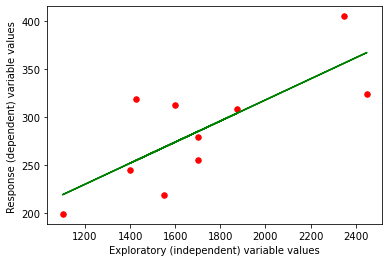

In [15]:
def do_all_regression_stuff(x, y):
    mean_exploratory = mean(x)
    print('Mean of the exploratory (independent) variable = ', mean_exploratory)
    mean_response = mean(y)
    print('Mean of response (dependent) variable = ', mean_response)
    
    cov_xy = round(covariance(x, y), 4)
    print('Covariance between exploratory and response variables = ', cov_xy)
    var_x = round(variance(x), 4)
    print('Variance of exploratory (independent) variable = ', var_x)
    
    beta_1_hat = round((cov_xy/var_x), 6) # Slope of the best fit straight line
    print('beta_1_hat (slope of the best fit straight line) = ', beta_1_hat)
    beta_0_hat = round((mean_response - beta_1_hat * mean_exploratory), 6) # Intercept of the best fit straight line
    print('beta_0_hat (intercept of the best fit straight line) = ', beta_0_hat)
    
    response_value_list = []
    for x_i in x:
        response_value_list.append(round(get_y_pred(x_i, beta_1_hat, beta_0_hat), 2))
        # print('Response Value List = ', response_value_list)
        # print('------------------')
    print('Response value list is ', response_value_list)
    plt.scatter(x, y, color='red', marker='o', s=30)
    plt.plot(x, response_value_list, color = "g")
    plt.xlabel('Exploratory (independent) variable values') 
    plt.ylabel('Response (dependent) variable values ')
    
    errors = get_residuals(y,response_value_list)
    print('Errors or Residuals of Predicted Response value and Actual Exploratory value =', errors)
    
    response_sum_residuals = get_sum_residuals (y, response_value_list)
    print('Sum of Residuals of Predicted and Actual Response Values = ', response_sum_residuals)

    # print('===================')
    response_value_ssr = round(get_ssr(y, response_value_list), 4)
    print('Sum Squared Residuals of Predicted and Actual Response Values = ', response_value_ssr)
    
    r_xy = correlation(x, y)
    print('Correlation between Exploratory and Response variables = ', round(r_xy, 4))

    r_sq = r_xy**2 * 100
    print('R-square between Exploratory and Response variables = ', round(r_sq, 4))
    print('Goodness of fit :', round(r_sq, 4) , '% of the Response Variable values are explained by the line of best fit')
    
    newdf = pd.DataFrame({
        'X Mean':[mean_exploratory],
        'Y Mean':[mean_response],
        'Beta-0(Slope)': [beta_1_hat],
        'Beta-1(Intercept)': [beta_0_hat],
        'SumOfResiduals':[response_sum_residuals],
        'SumSquareResiduals':[response_value_ssr],
        'R-XY(Correlation)':[round(r_xy, 2)],
        'R-Square-XY':[round(r_sq, 2)],
        'Goodness of fit(%)':[round(r_sq,2)]
    })
    
    newdf = newdf[['X Mean', 'Y Mean', 'Beta-0(Slope)', 'Beta-1(Intercept)', 'SumOfResiduals', 'SumSquareResiduals', 'R-XY(Correlation)', 'R-Square-XY', 'Goodness of fit(%)']]
    
    return newdf
    
my_newdf1 = do_all_regression_stuff(sq_ft, price)
my_newdf1.head(2)

## Linear Regression Data set = House Price

,House Price,Square Footage,forsale
0,245,1400,1
1,312,1600,1
2,279,1700,0
3,308,1875,1
4,199,1100,1
5,219,1550,0
6,405,2350,0
7,324,2450,0
8,319,1425,1
9,255,1700,0


0    245
1    312
2    279
3    308
4    199
5    219
6    405
7    324
8    319
9    255
Name: House Price, dtype: int64


[None]

Mean of the exploratory (independent) variable =  1715.0
Mean of response (dependent) variable =  286.5
Covariance between exploratory and response variables =  19166.6667
Variance of exploratory (independent) variable =  174611.1111
beta_1_hat (slope of the best fit straight line) =  0.109768
beta_0_hat (intercept of the best fit straight line) =  98.24788
Response value list is  [251.92, 273.88, 284.85, 304.06, 218.99, 268.39, 356.2, 367.18, 254.67, 284.85]
Errors or Residuals of Predicted Response value and Actual Exploratory value = [-6.92, 38.12, -5.85, 3.94, -19.99, -49.39, 48.8, -43.18, 64.33, -29.85]
Sum of Residuals of Predicted and Actual Response Values =  0.0
Sum Squared Residuals of Predicted and Actual Response Values =  13665.0629
Correlation between Exploratory and Response variables =  0.7621
R-square between Exploratory and Response variables =  58.0817
Goodness of fit : 58.0817 % of the Response Variable values are explained by the line of best fit


,X Mean,Y Mean,Beta-0(Slope),Beta-1(Intercept),SumOfResiduals,SumSquareResiduals,R-XY(Correlation),R-Square-XY,Goodness of fit(%)
0,1715.0,286.5,0.109768,98.24788,0.0,13665.0629,0.76,58.08,58.08


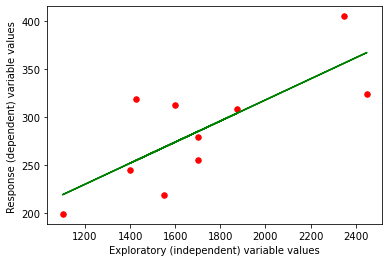

In [16]:
import pandas as pd
import os
desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop')
mylines = []
path = desktop + "\csvFilePath.txt"
with open (path, 'rt') as myfile:
    for myline in myfile:                
        mylines.append(myline)
New_path = mylines[0]
df0 = pd.read_csv(New_path[:-1])
df0.head(10)
list_y0 = df0['House Price']
list_x0 = df0['Square Footage']
[print(df0['House Price'])]

my_newdf0 = do_all_regression_stuff(list_x0, list_y0)
my_newdf0.head(2)

## Linear Regression Data set = Weddings

In [17]:
import pandas as pd
New_path = mylines[1]

df1 = pd.read_csv(New_path[:-1])
df1.head(5)
df1.tail(5)
list_y1 = df1['Wedding cost']
list_x1 = df1['Attendance']
print(df1['Wedding cost'])

,Couple's Income,Bride's age,Payor,Wedding cost,Attendance,Value Rating,Unnamed: 6,Unnamed: 7
0,"$130,000",22,Bride's Parents,60700.0,300,3,NaN,NaN
1,"$157,000",23,Bride's Parents,52000.0,350,1,NaN,NaN
2,"$98,000",27,Bride & Groom,47000.0,150,3,NaN,NaN
3,"$72,000",29,Bride & Groom,42000.0,200,5,NaN,NaN
4,"$86,000",25,Bride's Parents,34000.0,250,3,NaN,NaN


,Couple's Income,Bride's age,Payor,Wedding cost,Attendance,Value Rating,Unnamed: 6,Unnamed: 7
20,"$55,000",28,Bride's Parents,16000.0,100,5,NaN,NaN
21,"$53,000",31,Bride & Groom,14000.0,100,1,NaN,NaN
22,"$62,000",24,Bride's Parents,13000.0,150,1,NaN,NaN
23,"$40,000",26,Bride's Parents,7000.0,50,3,NaN,NaN
24,"$45,000",32,Bride & Groom,5000.0,50,5,NaN,NaN


0     60700.0
1     52000.0
2     47000.0
3     42000.0
4     34000.0
5     30500.0
6     30000.0
7     30000.0
8     28000.0
9     26000.0
10    25000.0
11    24000.0
12    24000.0
13    22000.0
14    20000.0
15    20000.0
16    20000.0
17    19000.0
18    19000.0
19    18000.0
20    16000.0
21    14000.0
22    13000.0
23     7000.0
24     5000.0
Name: Wedding cost, dtype: float64


Mean of the exploratory (independent) variable =  184.0
Mean of response (dependent) variable =  25848.0
Covariance between exploratory and response variables =  724341.6667
Variance of exploratory (independent) variable =  5566.6667
beta_1_hat (slope of the best fit straight line) =  130.121257
beta_0_hat (intercept of the best fit straight line) =  1905.688712
Response value list is  [40942.07, 47448.13, 21423.88, 27929.94, 34436.0, 21423.88, 34436.0, 40942.07, 34436.0, 27929.94, 21423.88, 27929.94, 27929.94, 27929.94, 27929.94, 27929.94, 14917.81, 21423.88, 27929.94, 21423.88, 14917.81, 14917.81, 21423.88, 8411.75, 8411.75]
Errors or Residuals of Predicted Response value and Actual Exploratory value = [19757.93, 4551.87, 25576.12, 14070.06, -436.0, 9076.12, -4436.0, -10942.07, -6436.0, -1929.94, 3576.12, -3929.94, -3929.94, -5929.94, -7929.94, -7929.94, 5082.19, -2423.88, -8929.94, -3423.88, 1082.19, -917.81, -8423.88, -1411.75, -3411.75]
Sum of Residuals of Predicted and Actual Res

,X Mean,Y Mean,Beta-0(Slope),Beta-1(Intercept),SumOfResiduals,SumSquareResiduals,R-XY(Correlation),R-Square-XY,Goodness of fit(%)
0,184.0,25848.0,130.121257,1905.688712,-0.0,1.944708e+09,0.73,53.77,53.77


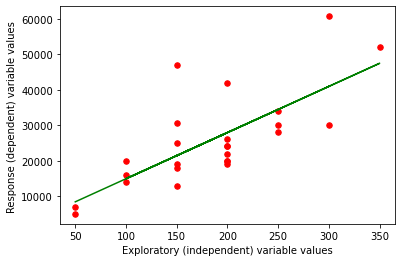

In [18]:
my_newdf2 = do_all_regression_stuff(list_x1, list_y1)
my_newdf2.head(2)

## Linear Regression Data set = Student Grades

In [19]:
New_path = mylines[2]
df3 = pd.read_csv(New_path[:-1])
df3.head(5)
df3.tail(5)
list_y3 = df3['Final Exam']
list_x3 = df3['Midterm']

,Student,Midterm,Final Exam
0,1,76,65
1,2,84,90
2,3,79,68
3,4,88,84
4,5,76,61


,Student,Midterm,Final Exam
51,52,80,72
52,53,62,79
53,54,70,75
54,55,87,90
55,56,89,95


Mean of the exploratory (independent) variable =  79.07
Mean of response (dependent) variable =  80.7
Covariance between exploratory and response variables =  77.313
Variance of exploratory (independent) variable =  124.8675
beta_1_hat (slope of the best fit straight line) =  0.61916
beta_0_hat (intercept of the best fit straight line) =  31.743019
Response value list is  [78.8, 83.75, 80.66, 86.23, 78.8, 72.61, 79.42, 89.94, 72.61, 88.71, 81.28, 85.61, 84.99, 70.75, 88.71, 78.18, 74.47, 88.71, 80.66, 68.89, 73.85, 75.7, 69.51, 73.85, 78.8, 76.32, 93.04, 67.65, 82.51, 76.32, 79.42, 90.56, 76.32, 75.7, 76.32, 91.18, 76.32, 86.85, 89.94, 84.37, 68.89, 72.61, 91.18, 83.13, 86.23, 88.71, 80.04, 84.37, 88.09, 77.56, 91.18, 81.28, 70.13, 75.08, 85.61, 86.85]
Errors or Residuals of Predicted Response value and Actual Exploratory value = [-13.8, 6.25, -12.66, -2.23, -17.8, 6.39, -6.42, 3.06, -12.61, -2.71, -28.28, -2.61, -29.99, 1.25, -1.71, 10.82, 6.53, 5.29, -2.66, 2.11, 10.15, -1.7, 4.49, -

,X Mean,Y Mean,Beta-0(Slope),Beta-1(Intercept),SumOfResiduals,SumSquareResiduals,R-XY(Correlation),R-Square-XY,Goodness of fit(%)
0,79.07,80.7,0.61916,31.743019,-0.3,6125.5877,0.55,30.06,30.06


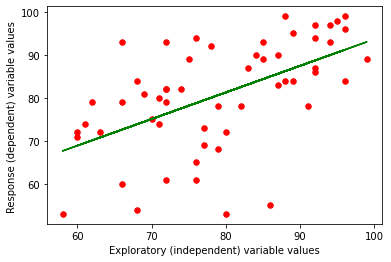

In [20]:
my_newdf3 = do_all_regression_stuff(list_x3, list_y3)
my_newdf3.head(2)

## This is the new addition to the existing "Regression with charts" notebook. Only scikitlearn is used for these prediction (one case with 2 Independent Variables and the other case with 4 Independent Variables to predict the result)

### Three previous examples of "Simple (Single Independent Variable") are also tested with the results obtained from scikitlearn and the results match

## Multivariate Linear Regression

This is the **Linear Regression** where the **Dependent Variable** depends on **more than one** Independent variable as opposed to a **Single** Independent variable as we used in the earlier cases.

As opposed to the equation ***y = b-0 + b-1*.x*** the **Multivariate Linear Regression** takes the form ***y = b-0 + b-1*.x-1 + b-2*.x-2 + .......+ b-n*.x-n*** for "n" **Independent Variables** that influence the value of the **Dependent Variable**

In this case we will use python **scikitlearn library** to create or model for Linear Regression.

The call to the **Linear Regression** model returned by the call to the scikitlearn library takes **an array of arrays** of parameters (one for each independent variable) and returns **an array** of **Coefficients (b-1, b-2, ...b-n)**. It also returns the single **Intercept (b-0)**.

The model also returns a **score** which is same as the **R-squared (Goodness of Fit)** as we have calculated before.

It is also possible to obtain other **Measures** of the correctness of the model as seen in the last example of this notebook. 

A degenerate case of this generic model for **Multivariate Linear Regression** is the case of **Simple Linear Regression** where a single **array of parameters** are passed in (representing the Single Independent Variable) and a Single **Coefficient** and the **Intercept** are returned by the model, which matches with the **Coefficient (Slope)** and **Intercept** as we calculated in our previous method.

We will also use a format where an **Array** of Independent Variables (2 in first case and 1 in next three cases) are passed into the **Regression Model** that we otained as the Linear Regression model.

The **Regression Model** obtained from scikitlearn returns the **Coefficient** (which we called **Slope**) and **Intercept** (which we also called **Intercept**)

The Coefficient (Slope) and the Intercept are used to predict the Stock Price based on 2 Independent Variables **Interest Rate** and **Unemployment Rate** in the first case and also to draw the **Best Fit** line for **Simple Linear Regression** and predict the Dependent Variable values (House Price, Wedding Cost and Final Grade) in the next three cases.

The scikitlearn model also prints the **R-Squared value (Goodness of Fit)** as we calculated in the 3 examples of **Simple Linear Regression** exercise before

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import scipy.stats as stats

In [22]:
New_path = mylines[3]
stock_market = pd.read_csv(New_path[:-1])

In [23]:
stock_market.head(20)

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


## Use a Scatterplot to see possible relationships between Predicted Variable (Stock Price) and two different Independent Variables (Interest Rate and Unemployment Rate). These are also called Factors)

Text(0.5, 1.0, 'Stock Index Price Vs Interest Rate')

Text(0.5, 0, 'Interest Rate')

Text(0, 0.5, 'Stock Index Price')

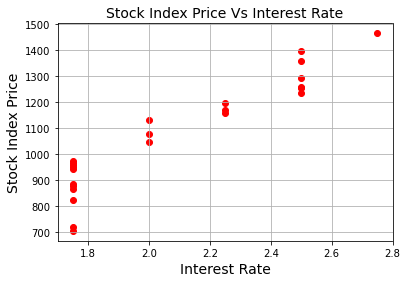

Text(0.5, 1.0, 'Stock Index Price Vs Unemployment Rate')

Text(0.5, 0, 'Unemployment Rate')

Text(0, 0.5, 'Stock Index Price')

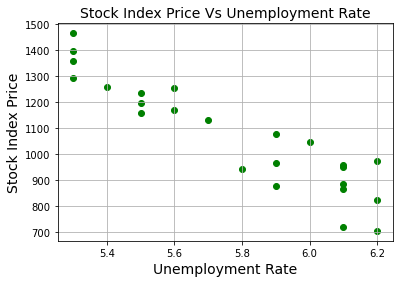

In [24]:
plt.scatter(stock_market['Interest_Rate'], stock_market['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(stock_market['Unemployment_Rate'], stock_market['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [25]:
X = stock_market[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = stock_market['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

regr.score(X, Y)

LinearRegression()

Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]


0.8976335894170215

## Predict a Stock Price for a randomly selected Interest Rate and Unemployment Rate

In [26]:
# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

Predicted Stock Index Price: 
 [1422.86238865]


## Predicting House Price using Linear Regression Model from scikitLearn

In [27]:
New_path = mylines[0]
house_price = pd.read_csv(New_path[:-1])
house_price.head(10)
x = house_price[['Square Footage']]
y = house_price['House Price']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

regr.score(x, y)

,House Price,Square Footage,forsale
0,245,1400,1
1,312,1600,1
2,279,1700,0
3,308,1875,1
4,199,1100,1
5,219,1550,0
6,405,2350,0
7,324,2450,0
8,319,1425,1
9,255,1700,0


LinearRegression()

Intercept: 
 98.24832962138083
Coefficients: 
 [0.10976774]


0.5808173118722726

## Predicting Wedding Cost using Linear Regression Model from scikitLearn

In [28]:
New_path = mylines[1]
weddings = pd.read_csv(New_path[:-1])
weddings.head(5)
weddings.tail(5)
x = weddings[['Attendance']]
y = weddings['Wedding cost']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

regr.score(x, y)

,Couple's Income,Bride's age,Payor,Wedding cost,Attendance,Value Rating,Unnamed: 6,Unnamed: 7
0,"$130,000",22,Bride's Parents,60700.0,300,3,NaN,NaN
1,"$157,000",23,Bride's Parents,52000.0,350,1,NaN,NaN
2,"$98,000",27,Bride & Groom,47000.0,150,3,NaN,NaN
3,"$72,000",29,Bride & Groom,42000.0,200,5,NaN,NaN
4,"$86,000",25,Bride's Parents,34000.0,250,3,NaN,NaN


,Couple's Income,Bride's age,Payor,Wedding cost,Attendance,Value Rating,Unnamed: 6,Unnamed: 7
20,"$55,000",28,Bride's Parents,16000.0,100,5,NaN,NaN
21,"$53,000",31,Bride & Groom,14000.0,100,1,NaN,NaN
22,"$62,000",24,Bride's Parents,13000.0,150,1,NaN,NaN
23,"$40,000",26,Bride's Parents,7000.0,50,3,NaN,NaN
24,"$45,000",32,Bride & Groom,5000.0,50,5,NaN,NaN


LinearRegression()

Intercept: 
 1905.6886227544892
Coefficients: 
 [130.12125749]


0.5377184992361959

## Predicting Final Student Grade using Linear Regression Model from scikitLearn

In [29]:
New_path = mylines[2]
student_grade = pd.read_csv(New_path[:-1])
student_grade.head(5)
student_grade.tail(5)
x = student_grade[['Midterm']]
y = student_grade['Final Exam']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
final_grades = regr.predict(x)

regr.score(x, y)

,Student,Midterm,Final Exam
0,1,76,65
1,2,84,90
2,3,79,68
3,4,88,84
4,5,76,61


,Student,Midterm,Final Exam
51,52,80,72
52,53,62,79
53,54,70,75
54,55,87,90
55,56,89,95


LinearRegression()

Intercept: 
 31.73855930440569
Coefficients: 
 [0.61916004]


0.3006222313867485

Text(0.5, 1.0, 'Final Grades Vs. Mid Term Grades')

Text(0.5, 0, 'Mid Term Grades')

Text(0, 0.5, 'Final Grades ')

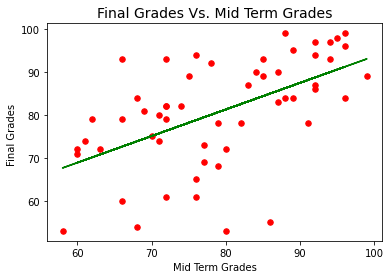

In [30]:
plt.scatter(student_grade[['Midterm']], student_grade['Final Exam'], color='red', marker='o', s=30)
plt.title('Final Grades Vs. Mid Term Grades', fontsize=14)
plt.plot(x, final_grades, color = "g")
plt.xlabel('Mid Term Grades') 
plt.ylabel('Final Grades ')

## A more detailed example of Multivariate Linear Regression using Multiple Independent Factors

In [31]:
New_path = mylines[4]
petrol_consumption = pd.read_csv(New_path[:-1])
petrol_consumption.head(50)
petrol_consumption.tail(5)

,Petrol tax,Average income,Paved Highways,Proportion of population with driver licenses,Consumption of petrol
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.00,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


,Petrol tax,Average income,Paved Highways,Proportion of population with driver licenses,Consumption of petrol
43,7.0,3745,2611,0.508,591
44,6.0,5215,2302,0.672,782
45,9.0,4476,3942,0.571,510
46,7.0,4296,4083,0.623,610
47,7.0,5002,9794,0.593,524


In [32]:
petrol_consumption.describe()

,Petrol tax,Average income,Paved Highways,Proportion of population with driver licenses,Consumption of petrol
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.657917,4241.833333,5565.416667,0.570333,576.770833
std,0.955381,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [33]:
X = petrol_consumption[['Petrol tax', 'Average income', 'Paved Highways', 'Proportion of population with driver licenses']]
y = petrol_consumption['Consumption of petrol']

In [34]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [36]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 389.6805716931451
Coefficients: 
 [-3.68508347e+01 -6.74189068e-02 -4.07700984e-03  1.36973871e+03]


## In case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, 

In [37]:
coeff_df = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
Petrol tax,-36.850835
Average income,-0.067419
Paved Highways,-0.004077
Proportion of population with driver licenses,1369.738713


## Test the model using the split Test data (20% of the data kept for test, 80% of the data used to train the model

In [38]:
y_pred = regr.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(50) 

,Actual,Predicted
29,534,471.570666
4,410,541.678792
26,577,591.018542
30,571,567.692808
32,577,653.480347
37,704,645.628427
34,487,509.833595
40,587,670.321198
7,467,498.033439
10,580,500.585631


## Metrics of the model. R-squared (Goodness of fit) is 67% which is not too bad (can be improved with better and more Training data

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 56.28883801809803
Mean Squared Error: 4543.4178404661825
Root Mean Squared Error: 67.40487994549194
